In [6]:
import numpy as np
import matplotlib.pyplot as plt
import os
from src.utility.utility_mdf import normalization_with_peaktime, get_data_from_file
import src.utility.utility_light_curve as ut_lc
from src.utility.utility_kepler_flare import kepler_flare
from scipy.stats import zscore

## Figure 3.6

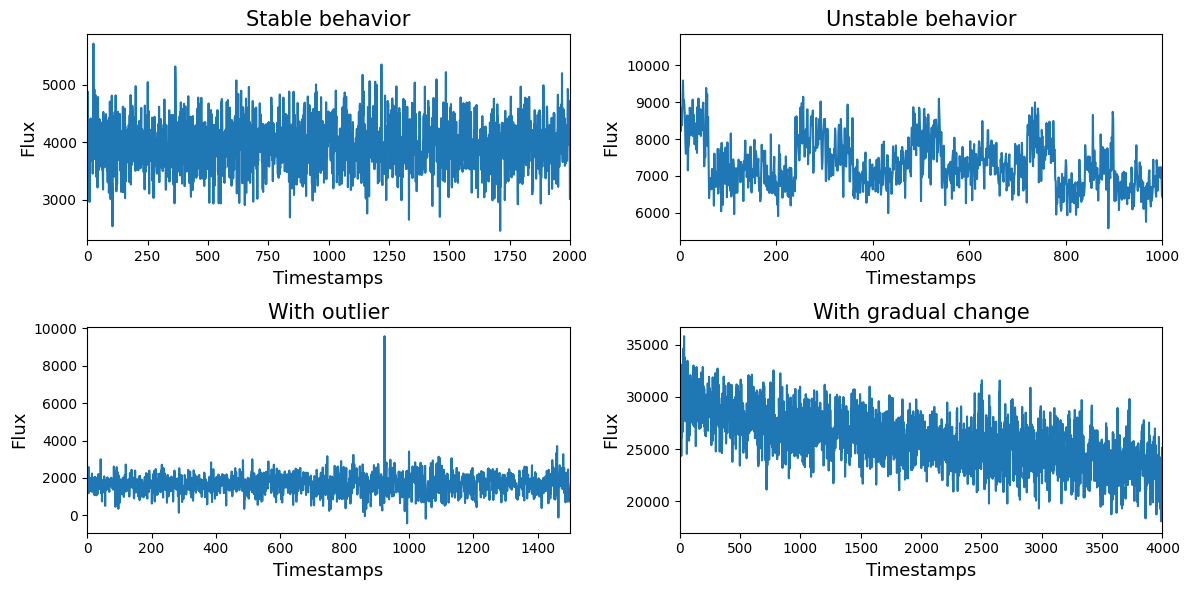

In [7]:
lc_name = 'light_curve_Gaia-DR2_2080495562784432384_date20191004'

data = get_data_from_file(lc_name)

fig, axes = plt.subplots(2, 2, figsize=(12, 6))
axes = axes.flatten()
axes[0].plot(data['instances'])
axes[0].set_title('Stable behavior', fontsize=15)
axes[0].set_xlabel('Timestamps', fontsize=13)
axes[0].set_ylabel('Flux', fontsize=13)
axes[0].set_xlim([0, 2000])

full_path = os.path.expanduser("~/source_code/thesis_sourcecode/datasets/")
ts_data = np.loadtxt(os.path.join(full_path,'unstable_lc'))
axes[1].plot(ts_data)
axes[1].set_title('Unstable behavior', fontsize=15)
axes[1].set_xlabel('Timestamps', fontsize=13)
axes[1].set_ylabel('Flux', fontsize=13)
axes[1].set_xlim([0, 1000])

lc_name =  'light_curve_Gaia-DR2_2190058421855697536_date20191005'
data = get_data_from_file(lc_name)
axes[2].plot(data['instances'])
axes[2].set_title('With outlier', fontsize=15)
axes[2].set_xlabel('Timestamps', fontsize=13)
axes[2].set_ylabel('Flux', fontsize=13)
axes[2].set_xlim([0, 1500])

lc_name =  'light_curve_Gaia-DR2_4881865201087102976_date20191106'
data = get_data_from_file(lc_name)
axes[3].plot(data['instances'])
axes[3].set_title('With gradual change', fontsize=15)
axes[3].set_xlabel('Timestamps', fontsize=13)
axes[3].set_ylabel('Flux', fontsize=13)
axes[3].set_xlim([0, 4000])



plt.tight_layout()
plt.show()

## Figuer 3.7 square and triangle flare

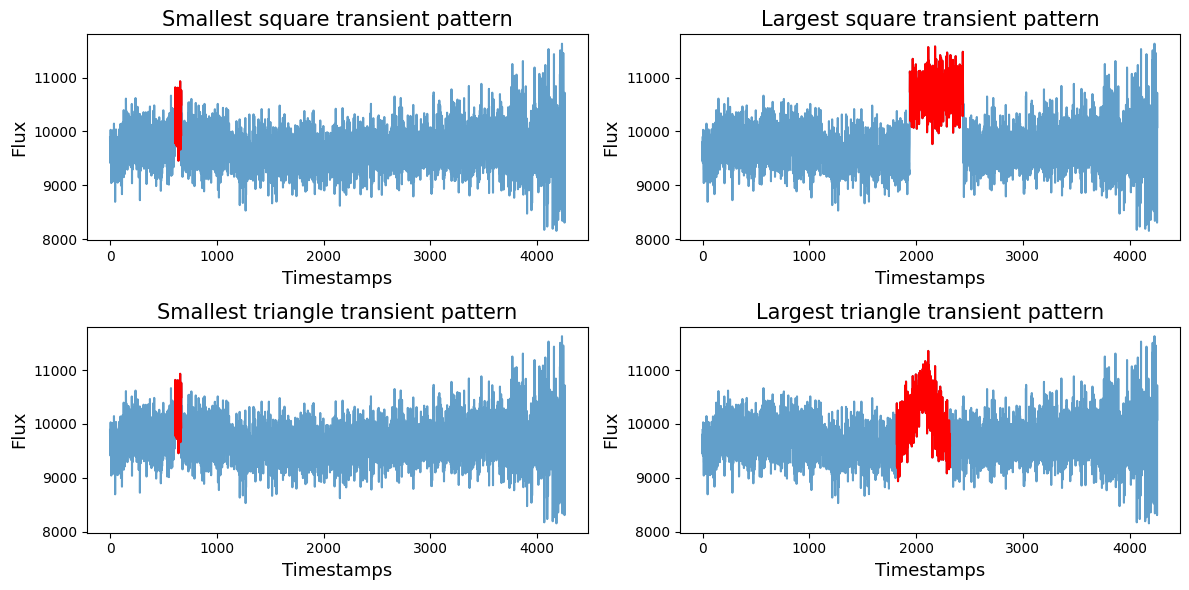

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(12, 6))

axes = axes.flatten()

data = ut_lc.get_data_from_file('41270235691548800_3', 1, 60, 'sq')
start = data['ansList'][0]
axes[0].plot(data['instances'], alpha=0.7)
axes[0].plot(data['ansList'],data['instances'][start:start+60], color='r')
axes[0].set_title('Smallest square transient pattern', fontsize=15)
axes[0].set_xlabel('Timestamps', fontsize=13)
axes[0].set_ylabel('Flux', fontsize=13)
# axes[0].set_xlim([0, 2000])

data = ut_lc.get_data_from_file('41270235691548800_3', 3, 500, 'sq')
start = data['ansList'][0]
axes[1].plot(data['instances'],alpha=0.7)
axes[1].plot(data['ansList'],data['instances'][start:start+500],color ='r')
axes[1].set_title('Largest square transient pattern', fontsize=15)
axes[1].set_xlabel('Timestamps', fontsize=13)
axes[1].set_ylabel('Flux', fontsize=13)

data = ut_lc.get_data_from_file('41270235691548800_3', 1, 60, 'sq')
start = data['ansList'][0]
axes[2].plot(data['instances'],alpha=0.7)
axes[2].plot(data['ansList'],data['instances'][start:start+60], color ='r')
axes[2].set_title('Smallest triangle transient pattern', fontsize=15)
axes[2].set_xlabel('Timestamps', fontsize=13)
axes[2].set_ylabel('Flux', fontsize=13)

data = ut_lc.get_data_from_file('41270235691548800_3', 3, 500, 'tr')
start = data['ansList'][0]
axes[3].plot(data['instances'],alpha=0.7)
axes[3].plot(data['ansList'],data['instances'][start:start+500], color='r')
axes[3].set_title('Largest triangle transient pattern', fontsize=15)
axes[3].set_xlabel('Timestamps', fontsize=13)
axes[3].set_ylabel('Flux', fontsize=13)



plt.tight_layout()
plt.show()

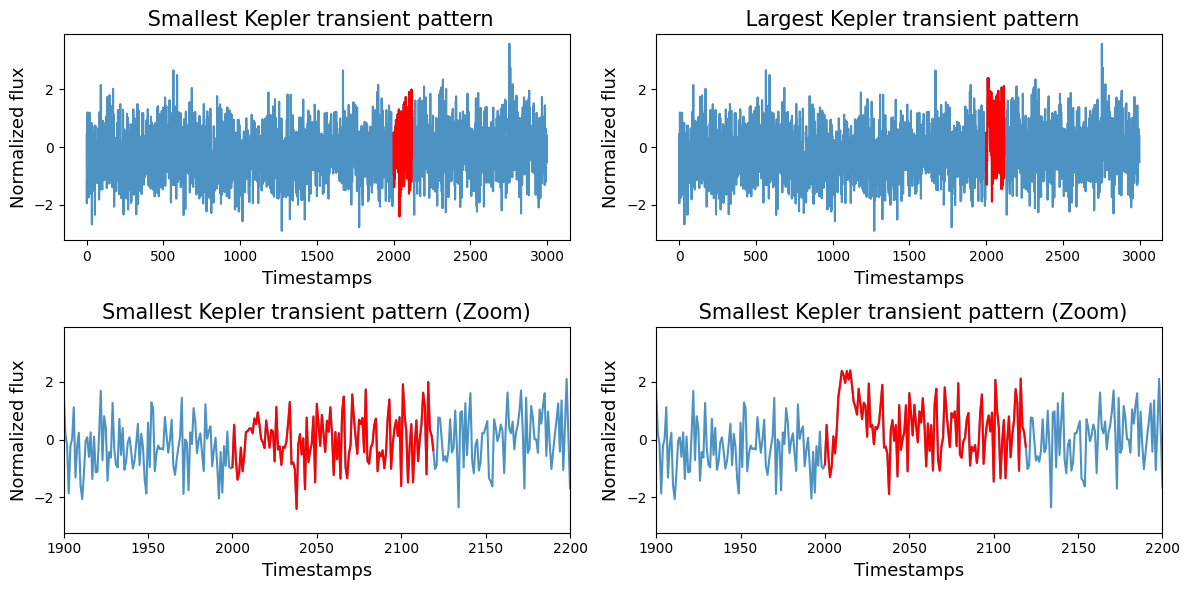

In [9]:
lc_name = '41242954059503360'
time_rise = 1
time_decay = 6
duration_rise=10
duration_decay=110

raw_data = ut_lc.get_data_training_from_file(file_name=lc_name)
flare_timestamps, flare_model = kepler_flare(time_rise=time_rise, time_decay=time_decay,
                                               duration_rise=duration_rise,
                                               duration_decay=duration_decay)

ts = raw_data['instances']
ts1 = zscore(ts)
ts3 = zscore(ts)
sigma = np.std(ts1)

flare_flux1 = list(np.array(flare_model) * (1 * sigma))
flare_flux3 = list(np.array(flare_model) * (3 * sigma))
time_start = 2000


for index, flux in enumerate(flare_flux1):
    ts1[time_start + index] = ts1[time_start + index] + flare_flux1[index]
    ts3[time_start + index] = ts3[time_start + index] + flare_flux3[index]

fig, axes = plt.subplots(2, 2, figsize=(12, 6))
axes = axes.flatten()
axes[0].plot(ts1[:3000], alpha=0.8)
axes[0].plot(range(2000,2000+len(flare_flux1)), ts1[2000:2000+len(flare_flux1)], 'r')
axes[0].set_xlabel('Timestamps', fontsize=13)
axes[0].set_ylabel('Normalized flux', fontsize=13)
axes[0].set_title(' Smallest Kepler transient pattern', fontsize=15)

axes[1].plot(ts3[:3000], alpha=0.8)
axes[1].plot(range(2000,2000+len(flare_flux3)), ts3[2000:2000+len(flare_flux3)], 'r')
axes[1].set_xlabel('Timestamps', fontsize=13)
axes[1].set_ylabel('Normalized flux', fontsize=13)
axes[1].set_title(' Largest Kepler transient pattern', fontsize=15)

axes[2].plot(ts1[:3000], alpha=0.8)
axes[2].plot(range(2000,2000+len(flare_flux1)), ts1[2000:2000+len(flare_flux1)], 'r')
axes[2].set_xlabel('Timestamps', fontsize=13)
axes[2].set_ylabel('Normalized flux', fontsize=13)
axes[2].set_title('Smallest Kepler transient pattern (Zoom)', fontsize=15)
axes[2].set_xlim([1900, 2200])

axes[3].plot(ts3[:3000], alpha=0.8)
axes[3].plot(range(2000,2000+len(flare_flux3)), ts3[2000:2000+len(flare_flux3)], 'r')
axes[3].set_xlabel('Timestamps', fontsize=13)
axes[3].set_ylabel('Normalized flux', fontsize=13)
axes[3].set_title(' Smallest Kepler transient pattern (Zoom)', fontsize=15)
axes[3].set_xlim([1900, 2200])

plt.tight_layout()
plt.show()